# LightGBM
- num_leaves：表示一棵树中最大的叶子数量。在LightGBM中，必须将num_leaves的值设置为小于2^（max_depth），以防止过度拟合。而更高的值会得到更高的准确度，但这也可能会造成过度拟合；
- max_depth：表示树的最大深度，这个参数有助于防止过度拟合；
- min_data_in_leaf：表示每个叶子中的最小数据量。设置一个过小的值可能会导致过度拟合；
- eval_metric：表示用于过度拟合检测和最佳模型选择的度量标准；
- learning_rate：表示学习率，用于降低梯度的级别；
- n_estimators：表示可以创建树的最大数量；
- colsample_bylevel, colsample_bytree, colsample_bynode — 分别表示各个层、各棵树、各个节点的列采样率；
- boosting_type — 该参数可选择以下的值:
  - ‘gbdt’,表示传统的梯度增强决策树；
  - ‘dart’,缺失则符合多重累计回归树（Multiple Additive Regression Trees）；
  - ‘goss’,表示基于梯度的单侧抽样（Gradient-based One-Side Sampling）；
  - ‘rf’,表示随机森林（Random Forest）；
- feature_fraction：表示每次迭代所使用的特征分数（即所占百分比，用小数表示）。将此值设置得较低，来提高训练速度；
- min_split_again：表示当在树的叶节点上进行进一步的分区时，所需最小损失值的减少量；
- n_jobs：表示并行的线程数量，如果设为-1则可以使用所有的可用线程；
- bagging_fraction：表示每次迭代所使用的数据分数（即所占百分比，用小数表示）。将此值设置得较低，以提高训练速度；
- application ：default（默认值）=regression, type（类型值）=enum, options（可选值）
    - regression : 表示执行回归任务；
    - binary : 表示二进制分类；
    - multiclass:表示多个类的类别；l
    - ambdarank : 表示lambdarank 应用；
- max_bin：表示用于存放特征值的最大容器（bin）数。有助于防止过度拟合；
- num_iterations：表示增强要执行的迭代的迭代；

In [14]:
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# 加载数据，对数据进行基本处理

In [15]:
iris = load_iris()

In [16]:
x_train, x_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
x_train.shape, x_val.shape

((120, 4), (30, 4))

<AxesSubplot: ylabel='count'>

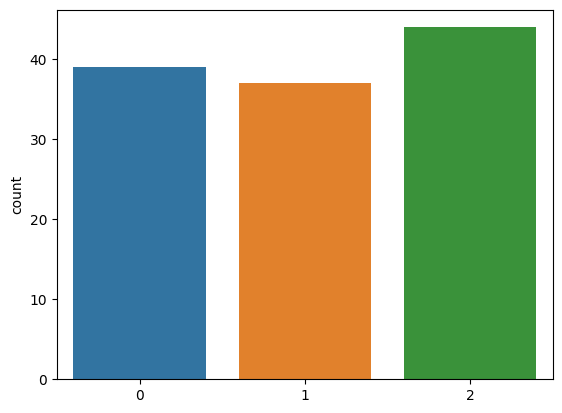

In [17]:
sns.countplot(x=y_train)

# 模型训练

## 回归模型 LGBMRegressor

In [18]:
lgbmr = lgb.LGBMRegressor(objective="regression", learning_rate=0.05, n_estimators=20)

In [19]:
lgbmr.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric="l1", callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.260711	valid_0's l2: 0.101377


LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [20]:
lgbmr.score(x_val, y_val)

0.8118770336882779

## 分类模型 LGBMClassifier

In [21]:
lgbmc = lgb.LGBMClassifier(objective="multiclass", learning_rate=0.05, n_estimators=20)

In [22]:
lgbmc.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric="logloss", callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.299941


LGBMClassifier(learning_rate=0.05, n_estimators=20, objective='multiclass')

In [24]:
lgbmc.score(x_val, y_val)

1.0

In [25]:
lgbmc.predict(x_val)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [26]:
lgbmc.predict_proba(x_val)
# 没有predict_log_proba

array([[0.11185946, 0.12170533, 0.76643521],
       [0.10930738, 0.75146448, 0.13922814],
       [0.79276816, 0.09671288, 0.11051896],
       [0.10264973, 0.11599207, 0.7813582 ],
       [0.78741702, 0.09606007, 0.11652291],
       [0.0967833 , 0.09255151, 0.81066519],
       [0.78741702, 0.09606007, 0.11652291],
       [0.11118075, 0.73181491, 0.15700434],
       [0.09537115, 0.62801856, 0.27661029],
       [0.10930738, 0.75146448, 0.13922814],
       [0.13178826, 0.35853788, 0.50967386],
       [0.11118075, 0.73181491, 0.15700434],
       [0.10883067, 0.74818719, 0.14298214],
       [0.11089415, 0.73106644, 0.15803941],
       [0.11117965, 0.73181582, 0.15700453],
       [0.78741702, 0.09606007, 0.11652291],
       [0.11115895, 0.73183286, 0.15700819],
       [0.11124189, 0.76641271, 0.1223454 ],
       [0.78741702, 0.09606007, 0.11652291],
       [0.79281837, 0.096719  , 0.11046263],
       [0.10603753, 0.27288307, 0.6210794 ],
       [0.1134335 , 0.74825281, 0.13831369],
       [0.

## 获取特征重要性 feature_importances_
特征重要性,按照列名排序

In [13]:
lgbmc.feature_importances_

array([ 25,   8, 116,  51])

# 网格搜索 GridSearchCV

In [20]:
lgbmc_gs = lgb.LGBMClassifier()

In [21]:
param_grid = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": range(10, 101, 10),
}

In [22]:
gs = GridSearchCV(lgbmc_gs, param_grid, cv=4)

In [23]:
gs.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': range(10, 101, 10)})

In [24]:
gs.score(x_val, y_val)

1.0

In [25]:
# 获取最好的参数,参数从parma_grid中找
print('Best parameters found by grid search are:', gs.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 80}


# 确定最好模型

In [27]:
best_lgbmc = lgb.LGBMClassifier(**gs.best_params_)

In [28]:
best_lgbmc.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='logloss', callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.0258881


LGBMClassifier(n_estimators=80)

In [30]:
best_lgbmc.score(x_val, y_val)

1.0